In [1]:
from __future__ import division

import urllib
import os
import glob
import random
import cv2
import numpy as np
from keras.models import Sequential
from keras.layers import Input, Conv2D, Dense, Flatten, MaxPool2D, Dropout
from keras.utils import to_categorical
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
%matplotlib inline

import utils

Using TensorFlow backend.


In [2]:
image_size = (32, 32)
gray = True
batch_size = 32
n_classes = 4

image_size = (512,512)
n_slices = 3
target_size = (image_size[0] // n_slices, image_size[1] // n_slices)
ratio = (1, 1)

In [3]:
train_path = "data/train"
validation_path = "data/validation/"
output_path = "output"

In [45]:
def download_image(url, file_name):
    return urllib.urlretrieve(url, file_name)

In [5]:
with open("test_images.txt", 'r') as f:
    image_urls = f.read().split("\n")

In [69]:
for i, image_url in enumerate(image_urls):
    download_image(image_url, os.path.join(validation_path, "{}.jpg".format(i)))

## Load Training Images

In [4]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        rotation_range=0.0,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_path,
        target_size=target_size,
        batch_size=batch_size,
        class_mode='categorical',
        color_mode='grayscale')

validation_generator = test_datagen.flow_from_directory(
        validation_path,
        target_size=target_size,
        batch_size=32,
        class_mode='categorical',
        color_mode='grayscale')

Found 383 images belonging to 4 classes.
Found 41 images belonging to 4 classes.


In [7]:
if gray:
    input_shape = (target_size[0], target_size[1], 1)
else:
    input_shape = (target_size[0], target_size[1], 3)

In [8]:
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=input_shape, activation='relu'))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(n_classes, activation='softmax'))

opt = optimizers.rmsprop(lr=0.001, decay=1e-6)

model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

In [ ]:
history = model.fit_generator(
            train_generator,
            steps_per_epoch=train_generator.n,
            epochs=5,
            validation_steps=800)

Epoch 1/5


In [114]:
model.evaluate_generator(validation_generator, validation_generator.n)

[4.0566755350593775, 0.48733413972598655]

# Load Test Images

In [78]:
validation_generator.n

41

## Create Model

## Train Model

In [51]:
image_list = []
X_list = []

for f_name in os.listdir(validation_path):
    img = cv2.imread(os.path.join(validation_path, f_name))
    if gray:
        img = cv2.imread(os.path.join(validation_path, f_name), 0) 
        img = np.expand_dims(img, -1)
    else: 
        img = cv2.imread(os.path.join(validation_path, f_name))
        
    img_resize = cv2.resize(img, image_size)
    image_list.append(img_resize)
    X_list.append(img_resize)
    
images = np.stack(image_list)

X_test = np.stack(X_list)

TypeError: src data type = 17 is not supported

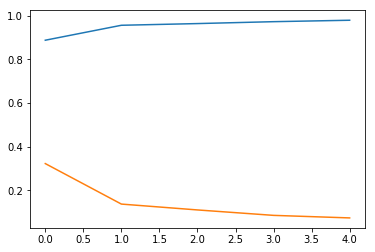

In [50]:
plt.plot(history.history['acc'])
plt.plot(history.history['loss'])

In [53]:
X_test.shape

(56, 32, 32, 3)

## Read test images

## Predict Labels

vegetation

water

desert

clouds

In [9]:
X_train.shape

(40, 512, 512, 3)

In [115]:
a = np.argmax(model.predict_generator(validation_generator, validation_generator.n), axis=1)

In [116]:
validation_generator.filenames

['clouds/55.jpg',
 'clouds/39.jpg',
 'clouds/0.jpg',
 'clouds/23.jpg',
 'clouds/50.jpg',
 'clouds/47.jpg',
 'clouds/51.jpg',
 'clouds/24.jpg',
 'clouds/21.jpg',
 'clouds/25.jpg',
 'clouds/54.jpg',
 'clouds/38.jpg',
 'desert/9.jpg',
 'desert/8.jpg',
 'desert/10.jpg',
 'desert/16.jpg',
 'desert/17.jpg',
 'desert/1.jpg',
 'desert/6.jpg',
 'desert/18.jpg',
 'desert/12.jpg',
 'desert/19.jpg',
 'desert/3.jpg',
 'desert/11.jpg',
 'desert/4.jpg',
 'desert/15.jpg',
 'desert/2.jpg',
 'desert/7.jpg',
 'vegetation/31.jpg',
 'vegetation/34.jpg',
 'vegetation/33.jpg',
 'vegetation/41.jpg',
 'vegetation/46.jpg',
 'vegetation/40.jpg',
 'water/48.jpg',
 'water/28.jpg',
 'water/37.jpg',
 'water/36.jpg',
 'water/35.jpg',
 'water/29.jpg',
 'water/42.jpg']

In [127]:
a = next(validation_generator)

In [131]:
a[0][0].shape

(64, 64, 1)

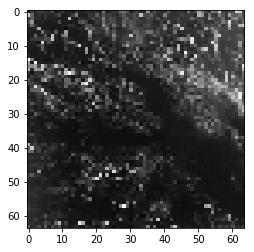

In [135]:
plt.imshow(a[0][0][:,:,0], cmap='gray')

In [52]:
TEST_PATH = "data/old/train/vegetation/"
OUTPUT_PATH = "output"
image_size = (512,512)
n_slices = 3
ratio = (1, 1)

image_list = []
gray_list = []
for f_name in os.listdir(TEST_PATH):
    img = cv2.imread(os.path.join(TEST_PATH, f_name))
    img_resize = cv2.resize(img, image_size)
    img_gray = gray_image = cv2.cvtColor(img_resize, cv2.COLOR_BGR2GRAY)
    slices = utils.prepare_images(img_gray, image_size, ratio, n_slices)
    gray_list.append(np.expand_dims(slices, -1))
    image_list.append(img_resize)
    
images = np.stack(image_list)
X = np.stack(gray_list)
X = X.reshape(X.shape[0] * X.shape[1], X.shape[2], X.shape[3], X.shape[4])

In [53]:
preds = model.predict(X)

ValueError: Error when checking : expected conv2d_13_input to have shape (None, 32, 32, 1) but got array with shape (108, 170, 170, 1)

In [24]:
labels = np.argmax(preds, axis=1)

In [25]:
labels = np.reshape(labels, (len(images), n_slices, n_slices))

## Visualize Predictions

In [28]:
classes = ['vegetation', 'water', 'desert', 'clouds']

In [29]:
colors = [(124,252,0), (0,191,255), (244,164,96), (255, 255, 255)]

In [32]:
for i, (img, l) in enumerate(zip(images, labels)):
    assignment_mask = np.zeros((l.shape[0], l.shape[1], 3))
    
    for label in xrange(len(classes)):
        assignment_mask[np.isin(l, label)] = colors[label]
        
    alpha = 0.5
    output = img.copy()
    output = output.astype('uint8')
    assignment_mask = assignment_mask.astype('uint8')
    assignment_mask = cv2.resize(assignment_mask, image_size, interpolation=cv2.INTER_CUBIC)
    overlay = assignment_mask
    output = cv2.addWeighted(overlay, alpha, output, 1 - alpha,
                    0, output)
    cv2.imwrite(os.path.join(OUTPUT_PATH, "{}.jpg".format(i)), img)
    cv2.imwrite(os.path.join(OUTPUT_PATH, "{}_overlay.jpg".format(i)), output)
    cv2.imwrite(os.path.join(OUTPUT_PATH, "{}_labels.jpg".format(i)), assignment_mask)

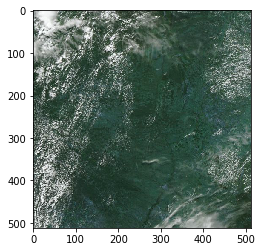

In [33]:
plt.imshow(img)

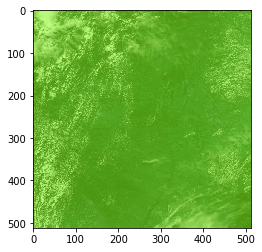

In [34]:
plt.imshow(output)

In [24]:
classes

['vegetation', 'water', 'desert', 'clouds']

In [25]:
np.bincount(l.flatten()) / l.size

array([  1.95312500e-03,   9.76562500e-04,   9.87304688e-01,
         9.76562500e-03])

In [57]:
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [89]:
l

array([[0, 2, 0, ..., 3, 3, 3],
       [2, 2, 2, ..., 3, 3, 3],
       [2, 3, 3, ..., 3, 3, 3],
       ..., 
       [2, 2, 3, ..., 3, 3, 3],
       [1, 3, 2, ..., 3, 3, 3],
       [2, 0, 2, ..., 0, 3, 3]])